In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for EDA plots
import seaborn as sns # for EDA plots
from scipy import stats # for Shapiro-Wilks test
from sklearn.model_selection import train_test_split # for splitting dataframes into train & test samples

In [3]:
# Read in the Metabolic Syndrome CSV file
df = pd.read_csv('data/Metabolic Syndrome.csv')

# High Level Examination of the Data

In [4]:
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [5]:
df.shape

(2401, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [23]:
df.columns

Index(['seqn', 'Age', 'Sex', 'Marital', 'Income', 'Race', 'WaistCirc', 'BMI',
       'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
       'Triglycerides', 'MetabolicSyndrome'],
      dtype='object')

In [34]:
df.describe()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364,0.342357
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477,0.474597
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000,0.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000,0.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000,0.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000,1.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000,1.000000


In [9]:
df.isna

<bound method DataFrame.isna of        seqn  Age     Sex  Marital  Income         Race  WaistCirc   BMI  \
0     62161   22    Male   Single  8200.0        White       81.0  23.3   
1     62164   44  Female  Married  4500.0        White       80.1  23.2   
2     62169   21    Male   Single   800.0        Asian       69.6  20.1   
3     62172   43  Female   Single  2000.0        Black      120.4  33.3   
4     62177   51    Male  Married     NaN        Asian       81.1  20.1   
...     ...  ...     ...      ...     ...          ...        ...   ...   
2396  71901   48  Female  Married  1000.0        Other        NaN  59.7   
2397  71904   30  Female   Single  2000.0        Asian        NaN  18.0   
2398  71909   28    Male   Single   800.0  MexAmerican      100.8  29.4   
2399  71911   27    Male  Married  8200.0  MexAmerican      106.6  31.3   
2400  71915   60    Male   Single  6200.0        White      106.6  27.5   

      Albuminuria  UrAlbCr  UricAcid  BloodGlucose  HDL  Triglyceri

In [22]:
# Get percentage of each column that is null
print(f"\nOverall percentage null:\n{(df.isnull().sum() / df.shape[0]) * 100}")

# Conclusion: Marital, Income, WaistCirc, BMI are the ones we need to care about

# Does this change when MetabolicSyndrome == 0 vs ==1?

# No MS
mask = df['MetabolicSyndrome'] == 0
noms = df[mask]
print(f"\nMetabolic Syndrome == 0 subset:  percentage null:\n{(noms.isnull().sum() / noms.shape[0]) * 100}")

# Yes MS
mask = df['MetabolicSyndrome'] == 1
yesms = df[mask]
print(f"\nMetabolic Syndrome == 1 subset:  percentage null:\n{(yesms.isnull().sum() / yesms.shape[0]) * 100}")


Overall percentage null:
seqn                 0.000000
Age                  0.000000
Sex                  0.000000
Marital              8.663057
Income               4.872970
Race                 0.000000
WaistCirc            3.540192
BMI                  1.082882
Albuminuria          0.000000
UrAlbCr              0.000000
UricAcid             0.000000
BloodGlucose         0.000000
HDL                  0.000000
Triglycerides        0.000000
MetabolicSyndrome    0.000000
dtype: float64

Metabolic Syndrome == 0 subset:  percentage null:
seqn                 0.000000
Age                  0.000000
Sex                  0.000000
Marital              9.246358
Income               5.193160
Race                 0.000000
WaistCirc            4.369854
BMI                  1.329956
Albuminuria          0.000000
UrAlbCr              0.000000
UricAcid             0.000000
BloodGlucose         0.000000
HDL                  0.000000
Triglycerides        0.000000
MetabolicSyndrome    0.000000
dtype: f

# Q: What to do with nulls?


## Julie
My thinking is:

Leave them all in place in an "original df"
When we do logistic regression, for the BMI and WaistCirc, we imput with means
For t-testing within the Martial status (the fun question about whether married people tend to be "fatter" even if they don't have metabolic syndrome), we drop those rows where Martial status is empty.

Don't know what we should do with Income yet.
What are your thoughts?

## Etinosa
Regarding the nulls, the proportions are small, so I will  tend towards dropping them. However, before you can infer replacement values for nulls, you have to plot the distributions for the attributes, to see the shape first. Then, if desired, I tend to replace them with the group median. So, we can have two dfs one with nulls dropped and another with the values inferred from the  group's distribution. We can then compare if we inadvertently introduced any biases

## Julie
OK, let me create one df with all the nulls dropped (i.e. if even one cell is null, the entire row is dropped)

And let me see about plotting the distributions - I'll just do histograms for each feature.

When we come together to merge our "cleaning_data" notebook, we can cut and paste from the best of our 2 notebooks

# We will create 2 datasets:  df_clean (all nulls dropped, 2009 rows left) and df_impute (imputed BMI, Income, WaistCirc with means)
#### (Leaving Martial Status uncleaned)

## Etinosa
On leaving martial status un-imputed:  "There could be some interesting patterns to the nulls. Are they appearing randomly across features? Or do we have missing  data more from, say, the income from a particular race or marital status? The end goal is to have two sets of dfs: one with the nulls dropped and another with the nulls imputed from analysis. We can then compare these two sets at the model building stage to see their performance difference"

On creating 2 datasets (df_clean, df_impute):  "I think we have to do something at least. Our data retrieval section was essential downloading a small csv from Kaggle, no fancy API calls or anything. We need to make up for that in the data cleaning and EDA"

In [29]:
# Create a "no nulls" df

df_clean = df.dropna()

print(f"\nNew df_clean:\n{df_clean.info()}")

print (f"\n***STATS***\nTotal number of rows dropped: {df.shape[0]-df_clean.shape[0]}")
print (f"Percentage (of original size) of rows dropped: {((df.shape[0]-df_clean.shape[0])/df.shape[0])*100}")

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2009 non-null   int64  
 1   Age                2009 non-null   int64  
 2   Sex                2009 non-null   object 
 3   Marital            2009 non-null   object 
 4   Income             2009 non-null   float64
 5   Race               2009 non-null   object 
 6   WaistCirc          2009 non-null   float64
 7   BMI                2009 non-null   float64
 8   Albuminuria        2009 non-null   int64  
 9   UrAlbCr            2009 non-null   float64
 10  UricAcid           2009 non-null   float64
 11  BloodGlucose       2009 non-null   int64  
 12  HDL                2009 non-null   int64  
 13  Triglycerides      2009 non-null   int64  
 14  MetabolicSyndrome  2009 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 251.1+ KB

New df_clean:
Non

array([[<Axes: title={'center': 'seqn'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'WaistCirc'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Albuminuria'}>],
       [<Axes: title={'center': 'UrAlbCr'}>,
        <Axes: title={'center': 'UricAcid'}>,
        <Axes: title={'center': 'BloodGlucose'}>],
       [<Axes: title={'center': 'HDL'}>,
        <Axes: title={'center': 'Triglycerides'}>,
        <Axes: title={'center': 'MetabolicSyndrome'}>]], dtype=object)

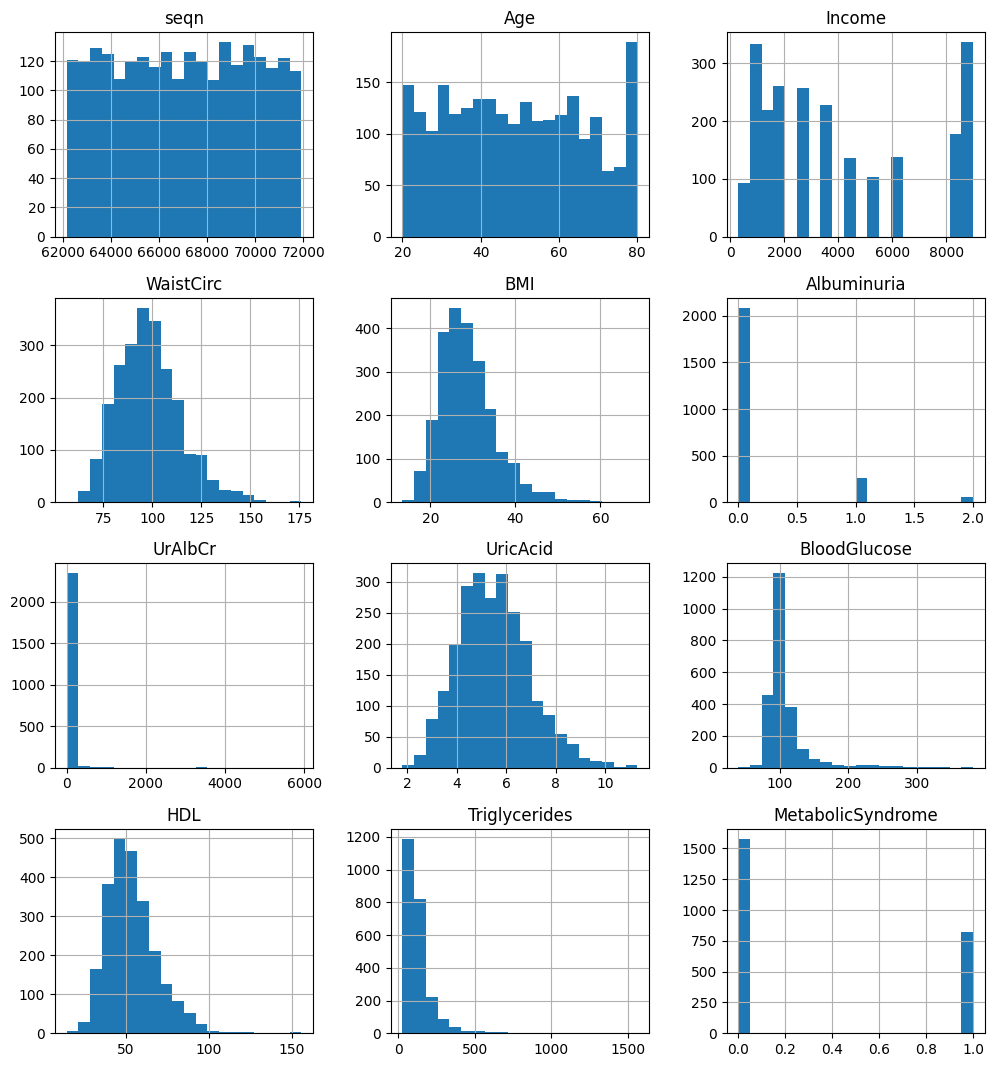

In [38]:
# Plot distributions of all numerical columns
df.hist(bins=20, figsize=(12, 13))

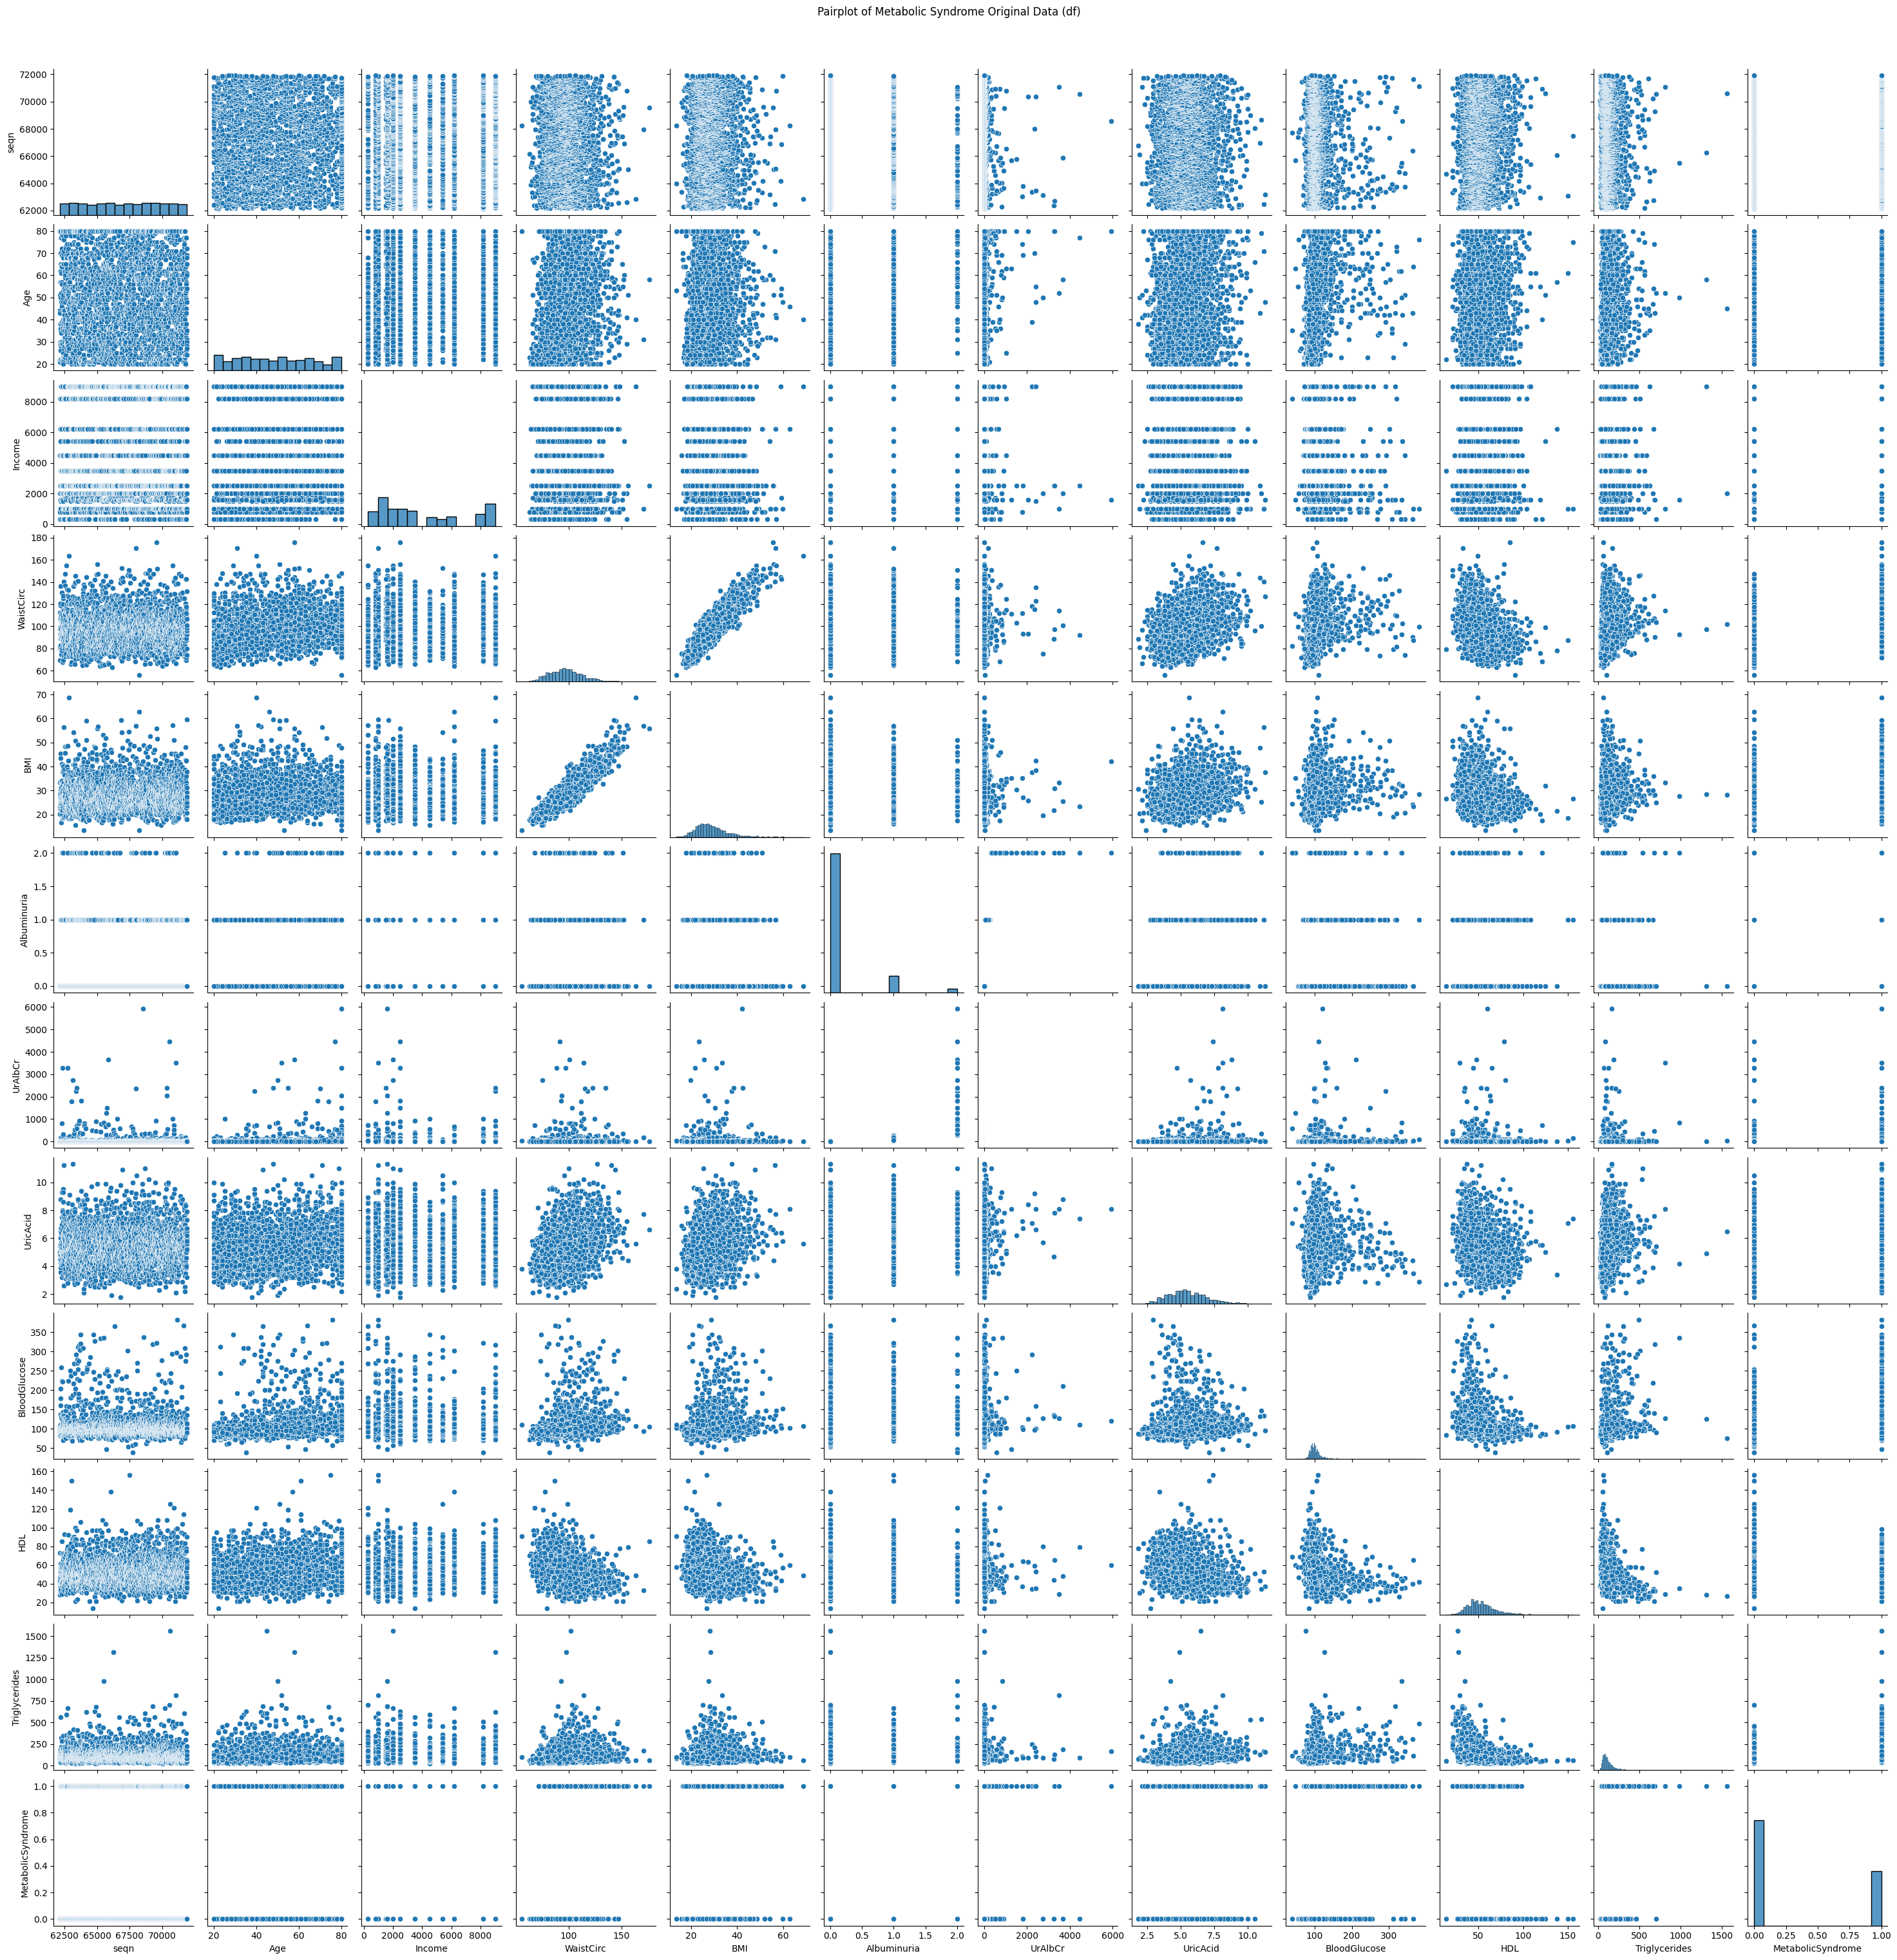

In [33]:
# Using a pairplot for a really quick overview
plot = sns.pairplot(data=df)
plot.fig.suptitle("Pairplot of Metabolic Syndrome Original Data (df)", y=1.02)
plt.show()

In [49]:
# # Test WaistCirc and BMI for normality using Shapiro-Wilk test
# stat, p = stats.shapiro(df['BMI'])
# #print('%0.30f' % p)
# print (f"BMI: Shapiro-Wilks test p-value: {p}")

# stat, p = stats.shapiro(df['WaistCirc'])
# #print('%0.30f' % p)
# print (f"WaistCirc: Shapiro-Wilks test p-value: {p}")

# stat, p = stats.shapiro(df['Income'])
# #print('%0.30f' % p)
# print (f"Income: Shapiro-Wilks test p-value: {p}")

BMI: Shapiro-Wilks test p-value: 1.0
WaistCirc: Shapiro-Wilks test p-value: 1.0
Income: Shapiro-Wilks test p-value: 1.0


In [62]:
# Test BMI, WaistCirc and Income for normality using Shapiro-Wilk test
stat_bmi, p_bmi = stats.shapiro(df['BMI'].dropna())
print (f"BMI: Shapiro-Wilks test p-value: {p_bmi}")

stat_wc, p_wc = stats.shapiro(df['WaistCirc'].dropna())
print (f"WaistCirc: Shapiro-Wilks test p-value: {p_wc}")

stat_inc, p_inc = stats.shapiro(df['Income'].dropna())
print (f"Income: Shapiro-Wilks test p-value: {p_inc}")

BMI: Shapiro-Wilks test p-value: 1.2052038514686988e-29
WaistCirc: Shapiro-Wilks test p-value: 9.833952221973155e-19
Income: Shapiro-Wilks test p-value: 3.366619560540373e-41


# Results of Shapiro-Wilks

p-value < 0.05 means we must reject null hypothesis
H0:  The data are normally distributed

The data are **not** normally distributed; therefore we imput null values for all 3 columns with **medians**.

In [63]:
# Julie's original
# Impute BMI, WaistCirc and Income with median
bmi_median = df['BMI'].median()
wc_median = df['WaistCirc'].median()
inc_median = df['Income'].median()

df_impute = df.copy()
df_impute['BMI'] = df['BMI'].fillna(bmi_median)
df_impute['WaistCirc'] = df['WaistCirc'].fillna(wc_median)
df_impute['Income'] = df['Income'].fillna(inc_median)

In [ ]:
# From Etinosa's notebook/approach:
# get the median for the combination of categories
group_median=raw_df.groupby(['Marital','Sex','Race'])['Income'].transform('median')
# fill null values for income based on the group statistics
df_impute['Income'].fillna(group_median, inplace=True)

# BMI
group_median=raw_df.groupby(['Marital','Sex','Race'])['BMI'].transform('median')
# fill null values for income based on the group statistics
df_impute['BMI'].fillna(group_median, inplace=True)


# WaistCirc
group_median=raw_df.groupby(['Marital','Sex','Race'])['WaistCirc'].transform('median')
# fill null values for income based on the group statistics
df_impute['WaistCirc'].fillna(group_median, inplace=True)

In [64]:
# Check our work:  Get percentage of each column that is null
print(f"\nOverall percentage null:\n{(df_impute.isnull().sum() / df.shape[0]) * 100}")
df_impute.info()


Overall percentage null:
seqn                 0.000000
Age                  0.000000
Sex                  0.000000
Marital              8.663057
Income               0.000000
Race                 0.000000
WaistCirc            0.000000
BMI                  0.000000
Albuminuria          0.000000
UrAlbCr              0.000000
UricAcid             0.000000
BloodGlucose         0.000000
HDL                  0.000000
Triglycerides        0.000000
MetabolicSyndrome    0.000000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2401 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc    

# Split df_clean and df_impute datasets into 20%/80% for TEST/TRAIN samples using sklearn

In [67]:
# Split df_clean and df_impute datasets into train (80%) and test (20%) subsets, using sklearn
# Idea Credit:
# 1) https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
# 2) https://towardsdatascience.com/how-to-split-a-dataframe-into-train-and-test-set-with-python-eaa1630ca7b3

# Define random state for reproducibility through our project
RANDOM_STATE_CONST = 42

df_clean_train, df_clean_test = train_test_split(df_clean, test_size=0.2, random_state=RANDOM_STATE_CONST, shuffle=True)
df_impute_train, df_impute_test = train_test_split(df_impute, test_size=0.2, random_state=RANDOM_STATE_CONST, shuffle=True)

In [81]:
# Check our work:
import math

print ('\ndf_impute stats after splitting for test/train:')

print (f"df_impute_test.shape[0] = {df_impute_test.shape[0]}, df_impute_train.shape[0] = {df_impute_train.shape[0]}, original df_impute row nums = {df_impute.shape[0]}")
print (f"df_impute_test.shape[0] = {df_impute_test.shape[0]}, df_impute_train.shape[0] = {df_impute_train.shape[0]}, original df_impute row nums = {df_impute.shape[0]}")

print ('\ndf_clean stats after splitting for test/train:')

print (f"df_clean_test.shape[0] = {df_clean_test.shape[0]}, df_clean_train.shape[0] = {df_clean_train.shape[0]}, original df_clean row nums = {df_clean.shape[0]}")
print (f"df_clean_test.shape[0] = {df_clean_test.shape[0]}, df_clean_train.shape[0] = {df_clean_train.shape[0]}, original df_clean row nums = {df_clean.shape[0]}")

print ('\nTEST dataset size assertions/checking math after splitting for test/train:')

print (f"df_impute_test.shape[0] == math.ceil(df_impute.shape[0] * 0.20)?: {df_impute_test.shape[0] == math.ceil((df_impute.shape[0] * 0.20))}")
print (f"df_clean_test.shape[0] == math.ceil(df_clean.shape[0] * 0.20)?: {df_clean_test.shape[0] == math.ceil((df_clean.shape[0] * 0.20))}")

print ('\nTRAIN dataset size assertions/checking math after splitting for test/train:')

print (f"df_impute_train.shape[0] == (df_impute.shape[0] - df_impute_test.shape[0])?: {df_impute_train.shape[0] == (df_impute.shape[0] - df_impute_test.shape[0])}")
print (f"df_clean_train.shape[0] == (df_clean.shape[0] - df_clean_test.shape[0])?: {df_clean_train.shape[0] == (df_clean.shape[0] - df_clean_test.shape[0])}")



df_impute stats after splitting for test/train:
df_impute_test.shape[0] = 481, df_impute_train.shape[0] = 1920, original df_impute row nums = 2401
df_impute_test.shape[0] = 481, df_impute_train.shape[0] = 1920, original df_impute row nums = 2401

df_clean stats after splitting for test/train:
df_clean_test.shape[0] = 402, df_clean_train.shape[0] = 1607, original df_clean row nums = 2009
df_clean_test.shape[0] = 402, df_clean_train.shape[0] = 1607, original df_clean row nums = 2009

TEST dataset size assertions/checking math after splitting for test/train:
df_impute_test.shape[0] == math.ceil(df_impute.shape[0] * 0.20)?: True
df_clean_test.shape[0] == math.ceil(df_clean.shape[0] * 0.20)?: True

TRAIN dataset size assertions/checking math after splitting for test/train:
df_impute_train.shape[0] == (df_impute.shape[0] - df_impute_test.shape[0])?: True
df_clean_train.shape[0] == (df_clean.shape[0] - df_clean_test.shape[0])?: True
